## Pandas tools and methods

In [1]:
import pandas as pd
import matplotlib as plt
import pandas as pd
import numpy as np

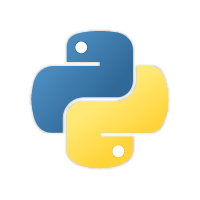

In [3]:
from IPython.display import Image
Image(filename='python.png')

In [31]:
%matplotlib inline
pd.set_option('display.notebook_repr_html',True)
pd.set_option('display.max_column',20)
pd.set_option('display.max_rows',25)

In [32]:
from datetime import datetime

In [33]:
now = datetime.now()

In [34]:
date = now.day
date

23

In [35]:
now.month

7

In [36]:
from datetime import date, time

In [37]:
time(5,14)

datetime.time(5, 14)

In [38]:
date(1970,9,3)

datetime.date(1970, 9, 3)

In [39]:
myAge = now - datetime(1997,1,6)

In [40]:
myAge.days/365

21.556164383561644

In [41]:
segment = pd.read_csv('transit_segments.csv')
segment.head()

,mmsi,name,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time
0,1,Us Govt Ves,1,1,5.1,13.2,9.2,14.5,96.5,2/10/09 16:03,2/10/09 16:27
1,1,Dredge Capt Frank,1,1,13.5,18.6,10.4,20.6,100.0,4/6/09 14:31,4/6/09 15:20
2,1,Us Gov Vessel,1,1,4.3,16.2,10.3,20.5,100.0,4/6/09 14:36,4/6/09 14:55
3,1,Us Gov Vessel,2,1,9.2,15.4,14.5,16.1,100.0,4/10/09 17:58,4/10/09 18:34
4,1,Dredge Capt Frank,2,1,9.2,15.4,14.6,16.2,100.0,4/10/09 17:59,4/10/09 18:35


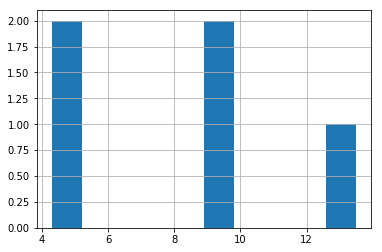

In [44]:
segment.seg_length.head().hist(bins=10)
#draw a histogram for column named = seg_length

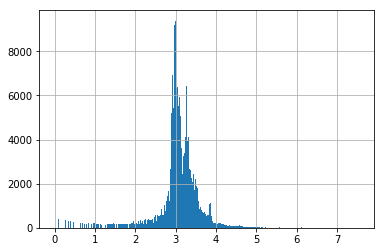

In [45]:
segment.seg_length.apply(np.log).hist(bins= 500)
#apply log on all values of seg_length and draw them so we can read easily

In [17]:
segment.seg_length.head()

0     5.1
1    13.5
2     4.3
3     9.2
4     9.2
Name: seg_length, dtype: float64

In [89]:
segment.seg_length.apply(np.log).head()

0    1.629241
1    2.602690
2    1.458615
3    2.219203
4    2.219203
Name: seg_length, dtype: float64

In [49]:
np.log2(32)

5.0

In [95]:
segment.st_time.dtype
#date time is given in string type so we have to convert into datetime 

dtype('O')

In [98]:
segment.st_time.loc[0]

'2/10/09 16:03'

In [99]:
datetime.strptime(segment.st_time.loc[0], '%m/%d/%y %H:%M')
#use strptime() to convert into datetime

datetime.datetime(2009, 2, 10, 16, 3)

In [100]:
from dateutil.parser import parse
#dateutil package includes a parser that attempts to detect the format of date string
# and convert them automatically

In [114]:
parse(segment.st_time.loc[0])

datetime.datetime(2009, 2, 10, 16, 3)

In [118]:
#try to apply on all
segment.st_time.apply(lambda d: parse(d))

0        2009-02-10 16:03:00
1        2009-04-06 14:31:00
2        2009-04-06 14:36:00
3        2009-04-10 17:58:00
4        2009-04-10 17:59:00
5        2010-03-20 16:06:00
6        2010-03-20 18:05:00
7        2011-05-04 11:28:00
8        2010-06-05 11:23:00
9        2010-06-08 11:03:00
10       2010-06-14 17:07:00
11       2010-06-17 16:35:00
                 ...        
262514   2010-05-19 19:46:00
262515   2010-05-31 14:27:00
262516   2010-06-05 05:25:00
262517   2010-06-27 02:35:00
262518   2010-07-01 03:49:00
262519   2010-07-02 03:30:00
262520   2010-06-13 10:32:00
262521   2010-06-15 12:49:00
262522   2010-06-15 21:32:00
262523   2010-06-17 19:16:00
262524   2010-06-18 02:52:00
262525   2010-06-18 10:19:00
Name: st_time, Length: 262526, dtype: datetime64[ns]

In [121]:
segment.st_time.apply(lambda d : datetime.strptime(d,'%m/%d/%y %H:%M'))

0        2009-02-10 16:03:00
1        2009-04-06 14:31:00
2        2009-04-06 14:36:00
3        2009-04-10 17:58:00
4        2009-04-10 17:59:00
5        2010-03-20 16:06:00
6        2010-03-20 18:05:00
7        2011-05-04 11:28:00
8        2010-06-05 11:23:00
9        2010-06-08 11:03:00
10       2010-06-14 17:07:00
11       2010-06-17 16:35:00
                 ...        
262514   2010-05-19 19:46:00
262515   2010-05-31 14:27:00
262516   2010-06-05 05:25:00
262517   2010-06-27 02:35:00
262518   2010-07-01 03:49:00
262519   2010-07-02 03:30:00
262520   2010-06-13 10:32:00
262521   2010-06-15 12:49:00
262522   2010-06-15 21:32:00
262523   2010-06-17 19:16:00
262524   2010-06-18 02:52:00
262525   2010-06-18 10:19:00
Name: st_time, Length: 262526, dtype: datetime64[ns]

In [107]:
segment.st_time

0         2/10/09 16:03
1          4/6/09 14:31
2          4/6/09 14:36
3         4/10/09 17:58
4         4/10/09 17:59
5         3/20/10 16:06
6         3/20/10 18:05
7          5/4/11 11:28
8          6/5/10 11:23
9          6/8/10 11:03
10        6/14/10 17:07
11        6/17/10 16:35
              ...      
262514    5/19/10 19:46
262515    5/31/10 14:27
262516      6/5/10 5:25
262517     6/27/10 2:35
262518      7/1/10 3:49
262519      7/2/10 3:30
262520    6/13/10 10:32
262521    6/15/10 12:49
262522    6/15/10 21:32
262523    6/17/10 19:16
262524     6/18/10 2:52
262525    6/18/10 10:19
Name: st_time, Length: 262526, dtype: object

In [123]:
pd.to_datetime(segment.st_time)
#convert using to_datetime function which convert entire series

0        2009-02-10 16:03:00
1        2009-04-06 14:31:00
2        2009-04-06 14:36:00
3        2009-04-10 17:58:00
4        2009-04-10 17:59:00
5        2010-03-20 16:06:00
6        2010-03-20 18:05:00
7        2011-05-04 11:28:00
8        2010-06-05 11:23:00
9        2010-06-08 11:03:00
10       2010-06-14 17:07:00
11       2010-06-17 16:35:00
                 ...        
262514   2010-05-19 19:46:00
262515   2010-05-31 14:27:00
262516   2010-06-05 05:25:00
262517   2010-06-27 02:35:00
262518   2010-07-01 03:49:00
262519   2010-07-02 03:30:00
262520   2010-06-13 10:32:00
262521   2010-06-15 12:49:00
262522   2010-06-15 21:32:00
262523   2010-06-17 19:16:00
262524   2010-06-18 02:52:00
262525   2010-06-18 10:19:00
Name: st_time, Length: 262526, dtype: datetime64[ns]

In [50]:
pd.to_datetime([None])
#pandas has custom NA for missing date values

DatetimeIndex(['NaT'], dtype='datetime64[ns]', freq=None)

### Merging and joining DataFrame objects 

In [51]:
vessels = pd.read_csv('vessel_information.csv',index_col='mmsi')
vessels.head()

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type
mmsi,,,,,,,,,,
1,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing
9,3,000000009/Raven/Shearwater,N,Unknown,Unknown,2,50.0/62.0,62.0,2,Pleasure/Tug
21,1,Us Gov Vessel,Y,Unknown,Unknown,1,208.0,208.0,1,Unknown
74,2,Mcfaul/Sarah Bell,N,Unknown,Unknown,1,155.0,155.0,1,Unknown
103,3,Ron G/Us Navy Warship 103/Us Warship 103,Y,Unknown,Unknown,2,26.0/155.0,155.0,2,Tanker/Unknown


In [52]:
[v for v in vessels.type.unique() if v.find('/')== -1]
# i don't know what is going on

['Unknown',
 'Other',
 'Tug',
 'Towing',
 'Pleasure',
 'Cargo',
 'WIG',
 'Fishing',
 'BigTow',
 'MilOps',
 'Tanker',
 'Passenger',
 'SAR',
 'Sailing',
 'Reserved',
 'Law',
 'Dredging',
 'AntiPol',
 'Pilot',
 'HSC',
 'Diving',
 'Resol-18',
 'Tender',
 'Spare',
 'Medical']

In [147]:
listv=[]
for v in vessels.type.unique():
    if(v.find('/')== -1):
        listv.append(v)
listv

['Unknown',
 'Other',
 'Tug',
 'Towing',
 'Pleasure',
 'Cargo',
 'WIG',
 'Fishing',
 'BigTow',
 'MilOps',
 'Tanker',
 'Passenger',
 'SAR',
 'Sailing',
 'Reserved',
 'Law',
 'Dredging',
 'AntiPol',
 'Pilot',
 'HSC',
 'Diving',
 'Resol-18',
 'Tender',
 'Spare',
 'Medical']

In [53]:
vessels.type.value_counts()
#count values

Cargo                              5622
Tanker                             2440
Pleasure                            601
Tug                                 221
Sailing                             205
Fishing                             200
Other                               178
Passenger                           150
Towing                              117
Unknown                             106
MilOps                               82
Cargo/Unknown                        79
                                   ... 
BigTow/Other/Towing/WIG               1
Dredging/MilOps/Reserved/Towing       1
Other/Spare/Towing/Tug/WIG            1
SAR/Tug                               1
BigTow/Other/Tug/Unknown/WIG          1
Sailing/Unknown                       1
BigTow/Reserved/Towing/Tug/WIG        1
Resol-18/Tanker                       1
BigTow/Tug/Unknown                    1
BigTow/MilOps/Tug                     1
Fishing/SAR/Unknown                   1
BigTow/Sailing/Towing/Tug             1


In [54]:
df1 = pd.DataFrame(dict(id=range(4), age=np.random.randint(18, 31, size=4)))
df1

,age,id
0,24,0
1,18,1
2,24,2
3,26,3


In [55]:
np.random.randint(18,31,size=4)

array([21, 20, 23, 26])

In [56]:
df2 = pd.DataFrame(dict( id=list(range(3))+list(range(3)), 
                        score=np.random.random(size=6)))
df2

,id,score
0,0,0.940161
1,1,0.380389
2,2,0.249274
3,0,0.627783
4,1,0.307618
5,2,0.043490


In [57]:
np.random.random(size=6)

array([0.18143423, 0.90370052, 0.27372828, 0.72491634, 0.78832978,
       0.22032933])

In [58]:
print(df1)
print(df2)

   age  id
0   24   0
1   18   1
2   24   2
3   26   3
   id     score
0   0  0.940161
1   1  0.380389
2   2  0.249274
3   0  0.627783
4   1  0.307618
5   2  0.043490


In [59]:
pd.merge(df1, df2)
# merge two dataframes using merge function


,age,id,score
0,24,0,0.940161
1,24,0,0.627783
2,18,1,0.380389
3,18,1,0.307618
4,24,2,0.249274
5,24,2,0.043490


In [60]:
pd.merge(df1, df2, how='outer')
#all values are merged in outer join with nan id 3 is missing in df2

,age,id,score
0,24,0,0.940161
1,24,0,0.627783
2,18,1,0.380389
3,18,1,0.307618
4,24,2,0.249274
5,24,2,0.043490
6,26,3,NaN


In [172]:
pd.merge(df1, df2, how='inner')
#it is default join values are merged where ids are matched

   age  id     score
0   30   0  0.761815
1   30   0  0.486181
2   23   1  0.339988
3   23   1  0.221605
4   29   2  0.814969
5   29   2  0.373808

In [173]:
pd.merge(df1, df2, how='left')
#values are merges from 2nd parameter to first

   age  id     score
0   30   0  0.761815
1   30   0  0.486181
2   23   1  0.339988
3   23   1  0.221605
4   29   2  0.814969
5   29   2  0.373808
6   29   3       NaN

In [175]:
pd.merge(df1, df2, how='right')
#vales are merged from 1st to 2nd parameter

   age  id     score
0   30   0  0.761815
1   30   0  0.486181
2   23   1  0.339988
3   23   1  0.221605
4   29   2  0.814969
5   29   2  0.373808

In [182]:
print(segment.head(1))
print('\n\n')
print(vessels.head(1))
#return first row

   mmsi         name  transit  segment  seg_length  avg_sog  min_sog  max_sog  \
0     1  Us Govt Ves        1        1         5.1     13.2      9.2     14.5   

   pdgt10        st_time       end_time  
0    96.5  2/10/09 16:03  2/10/09 16:27  



      num_names                                              names sov  \
mmsi                                                                     
1             8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y   

         flag flag_type  num_loas                                    loa  \
mmsi                                                                       
1     Unknown   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0   

      max_loa  num_types                             type  
mmsi                                                       
1       156.0          4  Dredging/MilOps/Reserved/Towing  


In [61]:
segment_merged = pd.merge(vessels, segment , left_index=True, right_on='mmsi')

In [62]:
segment_merged.head()

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type,...,name,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time
0,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Us Govt Ves,1,1,5.1,13.2,9.2,14.5,96.5,2/10/09 16:03,2/10/09 16:27
1,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Dredge Capt Frank,1,1,13.5,18.6,10.4,20.6,100.0,4/6/09 14:31,4/6/09 15:20
2,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Us Gov Vessel,1,1,4.3,16.2,10.3,20.5,100.0,4/6/09 14:36,4/6/09 14:55
3,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Us Gov Vessel,2,1,9.2,15.4,14.5,16.1,100.0,4/10/09 17:58,4/10/09 18:34
4,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Dredge Capt Frank,2,1,9.2,15.4,14.6,16.2,100.0,4/10/09 17:59,4/10/09 18:35


In [184]:
vessels.merge(segment, left_index=True, right_on='mmsi').head()

   num_names                                              names sov     flag  \
0          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   
1          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   
2          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   
3          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   
4          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   

  flag_type  num_loas                                    loa  max_loa  \
0   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0    156.0   
1   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0    156.0   
2   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0    156.0   
3   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0    156.0   
4   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0    156.0   

   num_types                             type      ...        \
0          4  Dr

### Concatenation 

In [64]:
x = np.random.random(5)
print(x)
y = np.random.random(5)
print(y)
np.concatenate([x,y])

[0.51733022 0.35975235 0.03756234 0.2567071  0.49351863]
[0.31240617 0.63611754 0.23792649 0.14741705 0.90564893]


array([0.51733022, 0.35975235, 0.03756234, 0.2567071 , 0.49351863,
       0.31240617, 0.63611754, 0.23792649, 0.14741705, 0.90564893])

In [65]:
np.r_[x,y]
#row wise
#also known as binding

array([0.51733022, 0.35975235, 0.03756234, 0.2567071 , 0.49351863,
       0.31240617, 0.63611754, 0.23792649, 0.14741705, 0.90564893])

In [66]:
np.c_[x,y]
#column wise
#also known as stacking

array([[0.51733022, 0.31240617],
       [0.35975235, 0.63611754],
       [0.03756234, 0.23792649],
       [0.2567071 , 0.14741705],
       [0.49351863, 0.90564893]])

In [67]:
mid1 = pd.read_excel('microbiome/MID1.xls','Sheet 1',index_col=0, header= None)

In [68]:
mid1

,1
0,
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",7
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus",2
"Archaea ""Crenarchaeota"" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus",3
"Archaea ""Crenarchaeota"" Thermoprotei Thermoproteales Thermofilaceae Thermofilum",3
"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Methanocellales Methanocellaceae Methanocella",7
"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Methanosarcinales Methanosarcinaceae Methanimicrococcus",1
"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Methanosarcinales Methermicoccaceae Methermicoccus",1
"Archaea ""Euryarchaeota"" Archaeoglobi Archaeoglobales Archaeoglobaceae Ferroglobus",1
"Archaea ""Euryarchaeota"" Archaeoglobi Archaeoglobales Archaeoglobaceae Geoglobus",1


In [69]:
mid2 = pd.read_excel('microbiome/MID2.xls','Sheet 1',index_col=0, header= None)

In [70]:
mid2

,1
0,
"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Acidilobaceae Acidilobus",2
"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Caldisphaeraceae Caldisphaera",14
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",23
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Sulfophobococcus",1
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Thermosphaera",2
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Pyrodictiaceae Hyperthermus",1
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus",2
"Archaea ""Crenarchaeota"" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus",10
"Archaea ""Crenarchaeota"" Thermoprotei Sulfolobales Sulfolobaceae Sulfurisphaera",11


In [71]:
#give name to columns
mid1.columns = mid2.columns = ['Count']

In [72]:
mid1.index.name = mid2.index.name = 'Taxon'

In [73]:
mid1.head()

,Count
Taxon,
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",7
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus",2
"Archaea ""Crenarchaeota"" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus",3
"Archaea ""Crenarchaeota"" Thermoprotei Thermoproteales Thermofilaceae Thermofilum",3
"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Methanocellales Methanocellaceae Methanocella",7


In [74]:
mid2.head()

,Count
Taxon,
"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Acidilobaceae Acidilobus",2
"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Caldisphaeraceae Caldisphaera",14
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",23
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Sulfophobococcus",1
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Thermosphaera",2


In [75]:
mid1.index[:5]
#return name of index upto 5

Index(['Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera',
       'Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus',
       'Archaea "Crenarchaeota" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus',
       'Archaea "Crenarchaeota" Thermoprotei Thermoproteales Thermofilaceae Thermofilum',
       'Archaea "Euryarchaeota" "Methanomicrobia" Methanocellales Methanocellaceae Methanocella'],
      dtype='object', name='Taxon')

In [76]:
mid2.index.is_unique
#if index name is not repeated

True

In [80]:
#concatination of columns
pd.concat([mid1,mid2],axis=1).head()
# columns of two DataFrames are concatenated with respect to index name

,Count,Count
"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Acidilobaceae Acidilobus",NaN,2.0
"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Caldisphaeraceae Caldisphaera",NaN,14.0
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",7.0,23.0
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Sulfophobococcus",NaN,1.0
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Thermosphaera",NaN,2.0


In [26]:
pd.concat([mid1,mid2],axis=1)

,Count,Count
"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Acidilobaceae Acidilobus",NaN,2.0
"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Caldisphaeraceae Caldisphaera",NaN,14.0
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",7.0,23.0
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Sulfophobococcus",NaN,1.0
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Thermosphaera",NaN,2.0
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Pyrodictiaceae Hyperthermus",NaN,1.0
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus",2.0,2.0
"Archaea ""Crenarchaeota"" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus",3.0,10.0
"Archaea ""Crenarchaeota"" Thermoprotei Sulfolobales Sulfolobaceae Sulfurisphaera",NaN,11.0
"Archaea ""Crenarchaeota"" Thermoprotei Thermoproteales Thermofilaceae Thermofilum",3.0,9.0


In [23]:
pd.concat([mid1,mid2],axis=1).shape

(438, 2)

In [24]:
pd.concat([mid1,mid2],axis=0).head()
#rows are concatenated

,Count
Taxon,
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",7
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus",2
"Archaea ""Crenarchaeota"" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus",3
"Archaea ""Crenarchaeota"" Thermoprotei Thermoproteales Thermofilaceae Thermofilum",3
"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Methanocellales Methanocellaceae Methanocella",7


In [28]:
pd.concat([mid2,mid1],axis=0).head()
#rows are concatenated
# if index name is same value is changed by first parameter's value

,Count
Taxon,
"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Acidilobaceae Acidilobus",2
"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Caldisphaeraceae Caldisphaera",14
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",23
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Sulfophobococcus",1
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Thermosphaera",2


In [30]:
pd.concat([mid2,mid1],axis=0).shape


(560, 1)

In [31]:
pd.concat([mid2,mid1],axis=0).tail()


,Count
Taxon,
"Bacteria ""Thermotogae"" Thermotogae Thermotogales Thermotogaceae Kosmotoga",9
"Bacteria ""Verrucomicrobia"" Opitutae Opitutales Opitutaceae Alterococcus",1
Bacteria Cyanobacteria Cyanobacteria Chloroplast Bangiophyceae,2
Bacteria Cyanobacteria Cyanobacteria Chloroplast Chlorarachniophyceae,85
Bacteria Cyanobacteria Cyanobacteria Chloroplast Streptophyta,1388


In [25]:
pd.concat([mid1,mid2],axis=0).shape

(560, 1)

In [36]:
pd.concat([mid1,mid2],axis=1,join='inner').head()
# join = 'inner' return matched index names

,Count,Count
Taxon,,
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",7,23
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus",2,2
"Archaea ""Crenarchaeota"" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus",3,10
"Archaea ""Crenarchaeota"" Thermoprotei Thermoproteales Thermofilaceae Thermofilum",3,9
"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Methanocellales Methanocellaceae Methanocella",7,9


In [38]:
#fill missing value of first table with values of 2nd table
mid1.combine_first(mid2).head()

,Count
Taxon,
"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Acidilobaceae Acidilobus",2.0
"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Caldisphaeraceae Caldisphaera",14.0
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",7.0
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Sulfophobococcus",1.0
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Thermosphaera",2.0


In [83]:
mid1.combine_first(mid2).shape

(438, 1)

In [87]:
mid1.shape

(272, 1)

In [88]:
mid2.shape

(288, 1)

In [89]:
pd.concat([mid1,mid2],keys=['patient1','patient2']).head()
#hierarchical index based on keys identifying the orignal tables

Count
         Taxon                                                    
patient1 Archaea "Crenarchaeota" Thermoprotei Desulfuroc...      7
         Archaea "Crenarchaeota" Thermoprotei Desulfuroc...      2
         Archaea "Crenarchaeota" Thermoprotei Sulfolobal...      3
         Archaea "Crenarchaeota" Thermoprotei Thermoprot...      3
         Archaea "Euryarchaeota" "Methanomicrobia" Metha...      7

In [90]:
pd.concat(dict(patient1=mid1, patient2=mid2),axis=1).head()

,patient1,patient2
,Count,Count
"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Acidilobaceae Acidilobus",NaN,2.0
"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Caldisphaeraceae Caldisphaera",NaN,14.0
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",7.0,23.0
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Sulfophobococcus",NaN,1.0
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Thermosphaera",NaN,2.0


In [91]:
pd.concat(dict(patient1=mid1, patient2=mid2),axis=1,ignore_index=True).head()

,0,1
"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Acidilobaceae Acidilobus",NaN,2.0
"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Caldisphaeraceae Caldisphaera",NaN,14.0
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",7.0,23.0
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Sulfophobococcus",NaN,1.0
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Thermosphaera",NaN,2.0


### Reshaping

In [92]:
cdystonia = pd.read_csv('cdystonia.csv')
cdystonia.head()

,patient,obs,week,site,id,treat,age,sex,twstrs
0,1,1,0,1,1,5000U,65,F,32
1,1,2,2,1,1,5000U,65,F,30
2,1,3,4,1,1,5000U,65,F,24
3,1,4,8,1,1,5000U,65,F,37
4,1,5,12,1,1,5000U,65,F,39


In [93]:
stacked = cdystonia.stack()
stacked
# data represented in stacked format
#columns are represented in rows

0    patient        1
     obs            1
     week           0
     site           1
     id             1
     treat      5000U
     age           65
     sex            F
     twstrs        32
1    patient        1
     obs            2
     week           2
                ...  
629  age           57
     sex            M
     twstrs        36
630  patient      109
     obs            6
     week          16
     site           9
     id            11
     treat      5000U
     age           57
     sex            M
     twstrs        51
Length: 5679, dtype: object

In [94]:
#inverse of stack
stacked.unstack().head()

,patient,obs,week,site,id,treat,age,sex,twstrs
0,1,1,0,1,1,5000U,65,F,32
1,1,2,2,1,1,5000U,65,F,30
2,1,3,4,1,1,5000U,65,F,24
3,1,4,8,1,1,5000U,65,F,37
4,1,5,12,1,1,5000U,65,F,39


In [95]:
cdystonia1 = cdystonia.set_index(['patient','obs'])
cdystonia1.head()

week  site  id  treat  age sex  twstrs
patient obs                                        
1       1       0     1   1  5000U   65   F      32
        2       2     1   1  5000U   65   F      30
        3       4     1   1  5000U   65   F      24
        4       8     1   1  5000U   65   F      37
        5      12     1   1  5000U   65   F      39

In [96]:
cdystonia1.index.is_unique

True

In [97]:
twstrs_wide = cdystonia1['twstrs'].unstack('obs')
twstrs_wide.head()
# twstrs are unstacked according to obs


obs,1,2,3,4,5,6
patient,,,,,,
1,32.0,30.0,24.0,37.0,39.0,36.0
2,60.0,26.0,27.0,41.0,65.0,67.0
3,44.0,20.0,23.0,26.0,35.0,35.0
4,53.0,61.0,64.0,62.0,NaN,NaN
5,53.0,35.0,48.0,49.0,41.0,51.0


In [98]:
cdystonia_long = cdystonia[['patient','site','id',
                            'treat','age','sex','week']].drop_duplicates().merge(
    twstrs_wide,right_index=True,left_on='patient',how='inner').head()
cdystonia_long


,patient,site,id,treat,age,sex,week,1,2,3,4,5,6
0,1,1,1,5000U,65,F,0,32.0,30.0,24.0,37.0,39.0,36.0
1,1,1,1,5000U,65,F,2,32.0,30.0,24.0,37.0,39.0,36.0
2,1,1,1,5000U,65,F,4,32.0,30.0,24.0,37.0,39.0,36.0
3,1,1,1,5000U,65,F,8,32.0,30.0,24.0,37.0,39.0,36.0
4,1,1,1,5000U,65,F,12,32.0,30.0,24.0,37.0,39.0,36.0


In [99]:
cdystonia.set_index(['patient','site','id','treat','age','sex'
                     ,'week'])['twstrs'].unstack('week').head()

,,,,,week,0,2,4,8,12,16
patient,site,id,treat,age,sex,,,,,,
1,1,1,5000U,65,F,32.0,30.0,24.0,37.0,39.0,36.0
2,1,2,10000U,70,F,60.0,26.0,27.0,41.0,65.0,67.0
3,1,3,5000U,64,F,44.0,20.0,23.0,26.0,35.0,35.0
4,1,4,Placebo,59,F,53.0,61.0,64.0,62.0,NaN,NaN
5,1,5,10000U,76,F,53.0,35.0,48.0,49.0,41.0,51.0


In [100]:
pd.melt(cdystonia_long, id_vars=['patient','site','id','treat','age','sex'],
var_name='obs', value_name='twsters').head()

,patient,site,id,treat,age,sex,obs,twsters
0,1,1,1,5000U,65,F,week,0.0
1,1,1,1,5000U,65,F,week,2.0
2,1,1,1,5000U,65,F,week,4.0
3,1,1,1,5000U,65,F,week,8.0
4,1,1,1,5000U,65,F,week,12.0


### Pivoting 

In [101]:
#used to transform data frame long and wide format
cdystonia.head(50)

,patient,obs,week,site,id,treat,age,sex,twstrs
0,1,1,0,1,1,5000U,65,F,32
1,1,2,2,1,1,5000U,65,F,30
2,1,3,4,1,1,5000U,65,F,24
3,1,4,8,1,1,5000U,65,F,37
4,1,5,12,1,1,5000U,65,F,39
5,1,6,16,1,1,5000U,65,F,36
6,2,1,0,1,2,10000U,70,F,60
7,2,2,2,1,2,10000U,70,F,26
8,2,3,4,1,2,10000U,70,F,27
9,2,4,8,1,2,10000U,70,F,41


In [102]:
cdystonia.pivot(index='patient',columns='obs',values='twstrs').head()
# three parameter are used in pivoting index, columns, values

obs,1,2,3,4,5,6
patient,,,,,,
1,32.0,30.0,24.0,37.0,39.0,36.0
2,60.0,26.0,27.0,41.0,65.0,67.0
3,44.0,20.0,23.0,26.0,35.0,35.0
4,53.0,61.0,64.0,62.0,NaN,NaN
5,53.0,35.0,48.0,49.0,41.0,51.0


In [210]:
cdystonia.pivot('patient','obs').head()
#omiting values parameter , we get DataFrame with hierarchical columns as unstacked

        week                            site                 ...  sex     \
obs        1    2    3    4     5     6    1    2    3    4  ...    3  4   
patient                                                      ...           
1        0.0  2.0  4.0  8.0  12.0  16.0  1.0  1.0  1.0  1.0  ...    F  F   
2        0.0  2.0  4.0  8.0  12.0  16.0  1.0  1.0  1.0  1.0  ...    F  F   
3        0.0  2.0  4.0  8.0  12.0  16.0  1.0  1.0  1.0  1.0  ...    F  F   
4        0.0  2.0  4.0  8.0   NaN   NaN  1.0  1.0  1.0  1.0  ...    F  F   
5        0.0  2.0  4.0  8.0  12.0  16.0  1.0  1.0  1.0  1.0  ...    F  F   

                    twstrs                                
obs         5     6      1     2     3     4     5     6  
patient                                                   
1           F     F   32.0  30.0  24.0  37.0  39.0  36.0  
2           F     F   60.0  26.0  27.0  41.0  65.0  67.0  
3           F     F   44.0  20.0  23.0  26.0  35.0  35.0  
4        None  None   53.0  61.0  64.

In [103]:
cdystonia.pivot_table(index=['site','treat'],
                      columns='week',values='twstrs',aggfunc=max).head(20)

week          0   2   4   8   12  16
site treat                          
1    10000U   60  41  48  49  65  67
     5000U    44  32  34  43  42  46
     Placebo  53  61  64  62  32  38
2    10000U   65  60  60  64  67  66
     5000U    67  64  65  64  62  64
     Placebo  53  56  52  57  61  54
3    10000U   50  43  51  46  49  56
     5000U    52  44  47  50  50  49
     Placebo  43  38  40  48  49  44
4    10000U   54  52  52  54  51  57
     5000U    52  34  43  45  47  46
     Placebo  52  55  51  52  54  57
5    10000U   50  50  32  46  54  57
     5000U    60  53  55  62  67  26
     Placebo  60  57  53  52  53  58
6    10000U   55  56  47  53  51  51
     5000U    59  55  50  56  59  53
     Placebo  54  53  51  57  57  57
7    10000U   53  47  45  45  50  53
     5000U    53  45  52  51  52  53

In [111]:
pd.crosstab(cdystonia.sex , cdystonia.site, values=cdystonia.twstrs, aggfunc='max')
#simple cross-tabulation of group frequencies

site,1,2,3,4,5,6,7,8,9
sex,,,,,,,,,
F,67,67,56,57,67,59,60,58,63
M,46,59,52,57,46,56,52,60,71


### Data Transformation 

In [217]:
#removing duplicate values, replacing values, and grouping values.

In [218]:
vessels.head()

      num_names                                              names sov  \
mmsi                                                                     
1             8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y   
9             3                         000000009/Raven/Shearwater   N   
21            1                                      Us Gov Vessel   Y   
74            2                                  Mcfaul/Sarah Bell   N   
103           3           Ron G/Us Navy Warship 103/Us Warship 103   Y   

         flag flag_type  num_loas                                    loa  \
mmsi                                                                       
1     Unknown   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0   
9     Unknown   Unknown         2                              50.0/62.0   
21    Unknown   Unknown         1                                  208.0   
74    Unknown   Unknown         1                                  155.0   
103   Unknown   Unknown  

In [215]:
#dealing with duplicates
vessels.duplicated('names')
#check for dup values

mmsi
1            False
9            False
21           False
74           False
103          False
310          False
3011         False
4731         False
15151        False
46809        False
80404        False
82003        False
             ...  
770576100    False
812719000    False
857632392    False
866946820     True
888888882     True
888888888    False
900000000    False
919191919    False
967191190     True
975318642     True
987654321    False
999999999     True
Length: 10771, dtype: bool

In [216]:
vessels.drop_duplicates('names')

           num_names                                              names sov  \
mmsi                                                                          
1                  8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y   
9                  3                         000000009/Raven/Shearwater   N   
21                 1                                      Us Gov Vessel   Y   
74                 2                                  Mcfaul/Sarah Bell   N   
103                3           Ron G/Us Navy Warship 103/Us Warship 103   Y   
310                1                                           Arabella   N   
3011               1                                         Charleston   N   
4731               1                                          000004731   N   
15151              2                             R L Enterkin/Us Vessel   N   
46809              1                                      Island Trader   N   
80404              1                                

In [223]:
cdystonia.head()

   patient  obs  week  site  id  treat  age sex  twstrs  treatment
0        1    1     0     1   1  5000U   65   F      32        1.0
1        1    2     2     1   1  5000U   65   F      30        1.0
2        1    3     4     1   1  5000U   65   F      24        1.0
3        1    4     8     1   1  5000U   65   F      37        1.0
4        1    5    12     1   1  5000U   65   F      39        1.0

In [228]:
#values replacement
cdystonia.treat.value_counts()

10000U     213
5000U      211
Placebo    207
Name: treat, dtype: int64

In [229]:
treat_map = {'Place':0 , '5000U':1,'10000U':2}
treat_map

{'10000U': 2, '5000U': 1, 'Place': 0}

In [222]:
cdystonia['treatment']=cdystonia.treat.map(treat_map)
cdystonia.treatment
# we map treatment with our values

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
5      1.0
6      2.0
7      2.0
8      2.0
9      2.0
10     2.0
11     2.0
      ... 
619    2.0
620    2.0
621    2.0
622    2.0
623    2.0
624    2.0
625    2.0
626    1.0
627    1.0
628    1.0
629    1.0
630    1.0
Name: treatment, Length: 631, dtype: float64

In [231]:
vals = pd.Series([float(i)**10 for i in range(10)])
vals

0    0.000000e+00
1    1.000000e+00
2    1.024000e+03
3    5.904900e+04
4    1.048576e+06
5    9.765625e+06
6    6.046618e+07
7    2.824752e+08
8    1.073742e+09
9    3.486784e+09
dtype: float64

In [233]:
np.log(vals)
#it seems like we have 0 values in our data which is making problem

/home/omer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


0         -inf
1     0.000000
2     6.931472
3    10.986123
4    13.862944
5    16.094379
6    17.917595
7    19.459101
8    20.794415
9    21.972246
dtype: float64

In [235]:
vals = vals.replace(0,1e-6)
vals


0    1.000000e-06
1    1.000000e+00
2    1.024000e+03
3    5.904900e+04
4    1.048576e+06
5    9.765625e+06
6    6.046618e+07
7    2.824752e+08
8    1.073742e+09
9    3.486784e+09
dtype: float64

In [236]:
np.log(vals)

0   -13.815511
1     0.000000
2     6.931472
3    10.986123
4    13.862944
5    16.094379
6    17.917595
7    19.459101
8    20.794415
9    21.972246
dtype: float64

In [238]:
cdystonia1.head()

             week  site  id  treat  age sex  twstrs
patient obs                                        
1       1       0     1   1  5000U   65   F      32
        2       2     1   1  5000U   65   F      30
        3       4     1   1  5000U   65   F      24
        4       8     1   1  5000U   65   F      37
        5      12     1   1  5000U   65   F      39

In [240]:
cdystonia1.treat.replace({'Placebo':0 , '5000U':1 , '10000U':2})


patient  obs
1        1      1
         2      1
         3      1
         4      1
         5      1
         6      1
2        1      2
         2      2
         3      2
         4      2
         5      2
         6      2
               ..
107      6      2
108      1      2
         2      2
         3      2
         4      2
         5      2
         6      2
109      1      1
         2      1
         4      1
         5      1
         6      1
Name: treat, Length: 631, dtype: int64

### Indicator variables 

In [244]:
vessels.head()

      num_names                                              names sov  \
mmsi                                                                     
1             8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y   
9             3                         000000009/Raven/Shearwater   N   
21            1                                      Us Gov Vessel   Y   
74            2                                  Mcfaul/Sarah Bell   N   
103           3           Ron G/Us Navy Warship 103/Us Warship 103   Y   

         flag flag_type  num_loas                                    loa  \
mmsi                                                                       
1     Unknown   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0   
9     Unknown   Unknown         2                              50.0/62.0   
21    Unknown   Unknown         1                                  208.0   
74    Unknown   Unknown         1                                  155.0   
103   Unknown   Unknown  

In [245]:
vessels.type.value_counts()

Cargo                         5622
Tanker                        2440
Pleasure                       601
Tug                            221
Sailing                        205
Fishing                        200
Other                          178
Passenger                      150
Towing                         117
Unknown                        106
MilOps                          82
Cargo/Unknown                   79
                              ... 
Tanker/Towing                    1
BigTow/Other/Towing/WIG          1
Tanker/WIG                       1
MilOps/Other/Unknown             1
BigTow/Reserved/Towing/WIG       1
SAR/Tanker                       1
Law/Other/Tanker                 1
BigTow/MilOps/Tug                1
BigTow/Towing/Tug/Unknown        1
Other/Reserved/Tug               1
Passenger/Sailing                1
Fishing/Towing/Tug               1
Name: type, Length: 206, dtype: int64

In [113]:
vessels.type.value_counts().index[:5]
# top 5 frequency 

Index(['Cargo', 'Tanker', 'Pleasure', 'Tug', 'Sailing'], dtype='object')

In [114]:
'Cargo' in vessels.type.value_counts().index[:5]

True

In [115]:
top5 = vessels.type.apply(lambda s : s in vessels.type.value_counts().index[:5])
top5

mmsi
1            False
9            False
21           False
74           False
103          False
310          False
3011         False
4731         False
15151         True
46809        False
80404         True
82003        False
             ...  
770576100     True
812719000     True
857632392    False
866946820     True
888888882    False
888888888    False
900000000    False
919191919     True
967191190    False
975318642    False
987654321    False
999999999     True
Name: type, Length: 10771, dtype: bool

In [116]:
vessels5 = vessels[top5]
vessels5

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type
mmsi,,,,,,,,,,
15151,2,R L Enterkin/Us Vessel,N,Unknown,Unknown,2,60.0/175.0,175.0,1,Tug
80404,1,Donnamarie,N,Unknown,Unknown,1,29.0,29.0,1,Pleasure
366235,1,Cape Domingo,N,United States of America,Domestic,1,207.0,207.0,1,Cargo
587370,1,Dorothy Moran,N,Unknown,Unknown,1,33.0,33.0,1,Tug
693559,1,Winslow C Kelsey],N,Unknown,Unknown,1,40.0,40.0,1,Tug
1233916,1,Double Barrel,N,Unknown,Unknown,1,20.0,20.0,1,Pleasure
3041300,1,Paz Colombia,N,Antigua and Barbuda,Foreign,1,118.0,118.0,1,Cargo
3663760,1,President Jackson,N,United States of America,Domestic,1,275.0,275.0,1,Cargo
3688360,1,Bob Hope,Y,United States of America,Domestic,1,289.0,289.0,1,Cargo


In [117]:
vessels5.type

mmsi
15151             Tug
80404        Pleasure
366235          Cargo
587370            Tug
693559            Tug
1233916      Pleasure
3041300         Cargo
3663760         Cargo
3688360         Cargo
7718175         Cargo
8011330         Cargo
8616300         Cargo
               ...   
725022000       Cargo
730010001     Sailing
730026000       Cargo
730031000       Cargo
735057548      Tanker
735059037     Sailing
760101000       Cargo
770576100     Sailing
812719000      Tanker
866946820         Tug
919191919    Pleasure
999999999    Pleasure
Name: type, Length: 9089, dtype: object

In [118]:
vessels5.type

mmsi
15151             Tug
80404        Pleasure
366235          Cargo
587370            Tug
693559            Tug
1233916      Pleasure
3041300         Cargo
3663760         Cargo
3688360         Cargo
7718175         Cargo
8011330         Cargo
8616300         Cargo
               ...   
725022000       Cargo
730010001     Sailing
730026000       Cargo
730031000       Cargo
735057548      Tanker
735059037     Sailing
760101000       Cargo
770576100     Sailing
812719000      Tanker
866946820         Tug
919191919    Pleasure
999999999    Pleasure
Name: type, Length: 9089, dtype: object

In [119]:
pd.get_dummies(vessels5.type).head(10)

,Cargo,Pleasure,Sailing,Tanker,Tug
mmsi,,,,,
15151,0,0,0,0,1
80404,0,1,0,0,0
366235,1,0,0,0,0
587370,0,0,0,0,1
693559,0,0,0,0,1
1233916,0,1,0,0,0
3041300,1,0,0,0,0
3663760,1,0,0,0,0
3688360,1,0,0,0,0


### Discretization 

In [120]:
cdystonia.describe()

,patient,obs,week,site,id,age,twstrs
count,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000
mean,54.402536,3.484945,6.957211,5.118859,7.020602,55.616482,41.478605
std,31.308495,1.716219,5.645316,2.669667,4.285215,12.123910,12.716784
min,1.000000,1.000000,0.000000,1.000000,1.000000,26.000000,6.000000
25%,27.500000,2.000000,2.000000,3.000000,3.000000,46.000000,32.500000
50%,54.000000,3.000000,4.000000,6.000000,7.000000,56.000000,43.000000
75%,81.000000,5.000000,12.000000,8.000000,10.000000,65.000000,51.000000
max,109.000000,6.000000,16.000000,9.000000,19.000000,83.000000,71.000000


In [121]:
cdystonia.age.describe()

count    631.000000
mean      55.616482
std       12.123910
min       26.000000
25%       46.000000
50%       56.000000
75%       65.000000
max       83.000000
Name: age, dtype: float64

In [122]:
cdystonia.age.head()

0    65
1    65
2    65
3    65
4    65
Name: age, dtype: int64

In [123]:
#Return indices of half-open bins to which each value of `x` belongs.
pd.cut(cdystonia.age, [20,30,40,50,60,70,80,90])

0      (60, 70]
1      (60, 70]
2      (60, 70]
3      (60, 70]
4      (60, 70]
5      (60, 70]
6      (60, 70]
7      (60, 70]
8      (60, 70]
9      (60, 70]
10     (60, 70]
11     (60, 70]
         ...   
619    (40, 50]
620    (30, 40]
621    (30, 40]
622    (30, 40]
623    (30, 40]
624    (30, 40]
625    (30, 40]
626    (50, 60]
627    (50, 60]
628    (50, 60]
629    (50, 60]
630    (50, 60]
Name: age, Length: 631, dtype: category
Categories (7, interval[int64]): [(20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70] < (70, 80] < (80, 90]]

In [124]:
#parenthesis indicate an value no included in opening interval
#square bracket indicate that value is included in interval
#we can switch it using right flag to false
pd.cut(cdystonia.age, [20,30,40,50,60,70,80,90],right=False)

0      [60, 70)
1      [60, 70)
2      [60, 70)
3      [60, 70)
4      [60, 70)
5      [60, 70)
6      [70, 80)
7      [70, 80)
8      [70, 80)
9      [70, 80)
10     [70, 80)
11     [70, 80)
         ...   
619    [50, 60)
620    [30, 40)
621    [30, 40)
622    [30, 40)
623    [30, 40)
624    [30, 40)
625    [30, 40)
626    [50, 60)
627    [50, 60)
628    [50, 60)
629    [50, 60)
630    [50, 60)
Name: age, Length: 631, dtype: category
Categories (7, interval[int64]): [[20, 30) < [30, 40) < [40, 50) < [50, 60) < [60, 70) < [70, 80) < [80, 90)]

In [125]:
# we can label data 
pd.cut(cdystonia.age, [20,40,
                       60,80,90], labels=['young','middle-aged','old','ancient'])

0              old
1              old
2              old
3              old
4              old
5              old
6              old
7              old
8              old
9              old
10             old
11             old
          ...     
619    middle-aged
620          young
621          young
622          young
623          young
624          young
625          young
626    middle-aged
627    middle-aged
628    middle-aged
629    middle-aged
630    middle-aged
Name: age, Length: 631, dtype: category
Categories (4, object): [young < middle-aged < old < ancient]

In [126]:
#Quantile-based discretization function. Discretize variable into
pd.qcut(cdystonia.age,4)

0        (56.0, 65.0]
1        (56.0, 65.0]
2        (56.0, 65.0]
3        (56.0, 65.0]
4        (56.0, 65.0]
5        (56.0, 65.0]
6        (65.0, 83.0]
7        (65.0, 83.0]
8        (65.0, 83.0]
9        (65.0, 83.0]
10       (65.0, 83.0]
11       (65.0, 83.0]
            ...      
619      (46.0, 56.0]
620    (25.999, 46.0]
621    (25.999, 46.0]
622    (25.999, 46.0]
623    (25.999, 46.0]
624    (25.999, 46.0]
625    (25.999, 46.0]
626      (56.0, 65.0]
627      (56.0, 65.0]
628      (56.0, 65.0]
629      (56.0, 65.0]
630      (56.0, 65.0]
Name: age, Length: 631, dtype: category
Categories (4, interval[float64]): [(25.999, 46.0] < (46.0, 56.0] < (56.0, 65.0] < (65.0, 83.0]]

In [127]:
#custom quantitles
quantiles = pd.qcut(cdystonia.age,[0,0.01,0.05,0.95,0.99,1])

quantiles[:30]

0     (36.0, 75.0]
1     (36.0, 75.0]
2     (36.0, 75.0]
3     (36.0, 75.0]
4     (36.0, 75.0]
5     (36.0, 75.0]
6     (36.0, 75.0]
7     (36.0, 75.0]
8     (36.0, 75.0]
9     (36.0, 75.0]
10    (36.0, 75.0]
11    (36.0, 75.0]
          ...     
18    (36.0, 75.0]
19    (36.0, 75.0]
20    (36.0, 75.0]
21    (36.0, 75.0]
22    (75.0, 79.0]
23    (75.0, 79.0]
24    (75.0, 79.0]
25    (75.0, 79.0]
26    (75.0, 79.0]
27    (75.0, 79.0]
28    (36.0, 75.0]
29    (36.0, 75.0]
Name: age, Length: 30, dtype: category
Categories (5, interval[float64]): [(25.999, 31.0] < (31.0, 36.0] < (36.0, 75.0] < (75.0, 79.0] < (79.0, 83.0]]

In [128]:
#custom quantitles
quantiles = pd.qcut(segment.seg_length,[0,0.01,0.05,0.95,0.99,1])
quantiles[:30]

0       (1.8, 7.8]
1      (7.8, 45.4]
2       (1.8, 7.8]
3      (7.8, 45.4]
4      (7.8, 45.4]
5      (7.8, 45.4]
6     (45.4, 89.7]
7      (7.8, 45.4]
8      (7.8, 45.4]
9      (7.8, 45.4]
10      (1.8, 7.8]
11     (7.8, 45.4]
          ...     
18     (7.8, 45.4]
19     (7.8, 45.4]
20      (1.8, 7.8]
21      (1.8, 7.8]
22     (7.8, 45.4]
23     (7.8, 45.4]
24     (7.8, 45.4]
25     (7.8, 45.4]
26     (7.8, 45.4]
27     (7.8, 45.4]
28     (7.8, 45.4]
29     (7.8, 45.4]
Name: seg_length, Length: 30, dtype: category
Categories (5, interval[float64]): [(0.999, 1.8] < (1.8, 7.8] < (7.8, 45.4] < (45.4, 89.7] < (89.7, 1882.0]]

In [129]:
#Convert categorical variable into dummy/indicator variables
pd.get_dummies(quantiles).head(10)


,"(0.999, 1.8]","(1.8, 7.8]","(7.8, 45.4]","(45.4, 89.7]","(89.7, 1882.0]"
0,0,1,0,0,0
1,0,0,1,0,0
2,0,1,0,0,0
3,0,0,1,0,0
4,0,0,1,0,0
5,0,0,1,0,0
6,0,0,0,1,0
7,0,0,1,0,0
8,0,0,1,0,0
9,0,0,1,0,0


### Permutation and sampling

In [130]:

#Randomly permute a sequence, or return a permuted range.
new_order = np.random.permutation(len(segment))
new_order[:30]


array([  4107, 174275, 178681, 187680, 205674,  52745, 170395, 216213,
       196004,  70586, 108714,  90616, 197563, 216246, 246268, 187982,
        32609, 110730,   8668, 213047, 163881, 195747, 138204, 144625,
       127232,  15719, 161344,  86332, 165238,  67181])

In [131]:
segment.take(new_order).head()
#Return the elements in the given *positional* indices along an axis.


,mmsi,name,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time
4107,210368000,Ingrid Gorthon,8,1,27.2,13.7,10.2,14.2,100.0,3/23/10 5:12,3/23/10 7:17
174275,367416750,Blue Fin,68,1,26.5,10.5,9.7,12.1,78.5,11/12/11 18:22,11/12/11 20:53
178681,367480970,Sand Master,50,1,2.4,2.2,1.4,3.3,0.0,6/14/11 18:07,6/14/11 19:18
187680,368591000,President Polk,63,1,28.4,10.6,9.4,13.7,40.1,2/16/10 5:52,2/16/10 8:31
205674,412103000,Zhong He,19,1,22.1,12.1,5.3,19.4,83.3,9/29/11 16:58,9/29/11 18:48


In [132]:
segment.head()

,mmsi,name,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time
0,1,Us Govt Ves,1,1,5.1,13.2,9.2,14.5,96.5,2/10/09 16:03,2/10/09 16:27
1,1,Dredge Capt Frank,1,1,13.5,18.6,10.4,20.6,100.0,4/6/09 14:31,4/6/09 15:20
2,1,Us Gov Vessel,1,1,4.3,16.2,10.3,20.5,100.0,4/6/09 14:36,4/6/09 14:55
3,1,Us Gov Vessel,2,1,9.2,15.4,14.5,16.1,100.0,4/10/09 17:58,4/10/09 18:34
4,1,Dredge Capt Frank,2,1,9.2,15.4,14.6,16.2,100.0,4/10/09 17:59,4/10/09 18:35


### Data aggregation and GroupBy operations 

In [133]:
cdystonia.head()

,patient,obs,week,site,id,treat,age,sex,twstrs
0,1,1,0,1,1,5000U,65,F,32
1,1,2,2,1,1,5000U,65,F,30
2,1,3,4,1,1,5000U,65,F,24
3,1,4,8,1,1,5000U,65,F,37
4,1,5,12,1,1,5000U,65,F,39


In [134]:
cdystonia_grouped = cdystonia.groupby(cdystonia.patient)
cdystonia_grouped.head(1)

,patient,obs,week,site,id,treat,age,sex,twstrs
0,1,1,0,1,1,5000U,65,F,32
6,2,1,0,1,2,10000U,70,F,60
12,3,1,0,1,3,5000U,64,F,44
18,4,1,0,1,4,Placebo,59,F,53
22,5,1,0,1,5,10000U,76,F,53
28,6,1,0,1,6,10000U,59,F,49
34,7,1,0,1,7,5000U,72,M,42
40,8,1,0,1,8,Placebo,40,M,34
46,9,1,0,1,9,5000U,52,F,41
52,10,1,0,1,10,Placebo,47,M,27


In [135]:
for patient, group in cdystonia_grouped:
    print(patient)
    print(group)
    print()

1
   patient  obs  week  site  id  treat  age sex  twstrs
0        1    1     0     1   1  5000U   65   F      32
1        1    2     2     1   1  5000U   65   F      30
2        1    3     4     1   1  5000U   65   F      24
3        1    4     8     1   1  5000U   65   F      37
4        1    5    12     1   1  5000U   65   F      39
5        1    6    16     1   1  5000U   65   F      36

2
    patient  obs  week  site  id   treat  age sex  twstrs
6         2    1     0     1   2  10000U   70   F      60
7         2    2     2     1   2  10000U   70   F      26
8         2    3     4     1   2  10000U   70   F      27
9         2    4     8     1   2  10000U   70   F      41
10        2    5    12     1   2  10000U   70   F      65
11        2    6    16     1   2  10000U   70   F      67

3
    patient  obs  week  site  id  treat  age sex  twstrs
12        3    1     0     1   3  5000U   64   F      44
13        3    2     2     1   3  5000U   64   F      20
14        3    3     4 

316       54    6    16     6   2  10000U   64   F      47

55
     patient  obs  week  site  id  treat  age sex  twstrs
317       55    1     0     6   3  5000U   57   M      56
318       55    2     2     6   3  5000U   57   M      55
319       55    3     4     6   3  5000U   57   M      44
320       55    4     8     6   3  5000U   57   M      50
321       55    5    12     6   3  5000U   57   M      53
322       55    6    16     6   3  5000U   57   M      52

56
     patient  obs  week  site  id  treat  age sex  twstrs
323       56    1     0     6   4  5000U   60   F      51
324       56    2     2     6   4  5000U   60   F      50
325       56    3     4     6   4  5000U   60   F      50
326       56    4     8     6   4  5000U   60   F      56
327       56    5    12     6   4  5000U   60   F      59
328       56    6    16     6   4  5000U   60   F      53

57
     patient  obs  week  site  id   treat  age sex  twstrs
329       57    1     0     6   5  10000U   44   F      53

615      106    6    16     9   8  5000U   43   M      71

107
     patient  obs  week  site  id   treat  age sex  twstrs
616      107    1     0     9   9  10000U   50   M      57
617      107    3     4     9   9  10000U   50   M      36
618      107    4     8     9   9  10000U   50   M      23
619      107    6    16     9   9  10000U   50   M      52

108
     patient  obs  week  site  id   treat  age sex  twstrs
620      108    1     0     9  10  10000U   39   F      63
621      108    2     2     9  10  10000U   39   F      51
622      108    3     4     9  10  10000U   39   F      46
623      108    4     8     9  10  10000U   39   F      50
624      108    5    12     9  10  10000U   39   F      50
625      108    6    16     9  10  10000U   39   F      54

109
     patient  obs  week  site  id  treat  age sex  twstrs
626      109    1     0     9  11  5000U   57   M      53
627      109    2     2     9  11  5000U   57   M      38
628      109    4     8     9  11  5000U   57

In [136]:
cdystonia_grouped.agg(np.mean).head()
#combine patient group with agg
#applies only on numeric data

,obs,week,site,id,age,twstrs
patient,,,,,,
1,3.5,7.0,1.0,1.0,65.0,33.000000
2,3.5,7.0,1.0,2.0,70.0,47.666667
3,3.5,7.0,1.0,3.0,64.0,30.500000
4,2.5,3.5,1.0,4.0,59.0,60.000000
5,3.5,7.0,1.0,5.0,76.0,46.166667


In [137]:
cdystonia_grouped.mean().head()

,obs,week,site,id,age,twstrs
patient,,,,,,
1,3.5,7.0,1.0,1.0,65.0,33.000000
2,3.5,7.0,1.0,2.0,70.0,47.666667
3,3.5,7.0,1.0,3.0,64.0,30.500000
4,2.5,3.5,1.0,4.0,59.0,60.000000
5,3.5,7.0,1.0,5.0,76.0,46.166667


In [138]:
cdystonia_grouped.mean().add_suffix('_mean').head()

,obs_mean,week_mean,site_mean,id_mean,age_mean,twstrs_mean
patient,,,,,,
1,3.5,7.0,1.0,1.0,65.0,33.000000
2,3.5,7.0,1.0,2.0,70.0,47.666667
3,3.5,7.0,1.0,3.0,64.0,30.500000
4,2.5,3.5,1.0,4.0,59.0,60.000000
5,3.5,7.0,1.0,5.0,76.0,46.166667


In [139]:
#median of the twstrs variable
cdystonia_grouped['twstrs'].quantile(0.5)

patient
1      34.0
2      50.5
3      30.5
4      61.5
5      48.5
6      48.0
7      42.0
8      32.5
9      35.5
10     20.5
11     44.5
12     26.0
       ... 
98     33.5
99     29.0
100    61.0
101    32.5
102    51.5
103    45.0
104    46.0
105    45.5
106    67.5
107    44.0
108    50.5
109    38.0
Name: twstrs, Length: 109, dtype: float64

In [140]:
cdystonia.groupby(['week','site']).mean().head()
#create a groupby week and site , combine them with mean values

patient  obs   id        age     twstrs
week site                                         
0    1         6.5  1.0  6.5  59.000000  43.083333
     2        19.5  1.0  7.5  53.928571  51.857143
     3        32.5  1.0  6.5  51.500000  38.750000
     4        42.5  1.0  4.5  59.250000  48.125000
     5        49.5  1.0  3.5  51.833333  49.333333

In [141]:
normalize = lambda x: (x- x.mean())/x.std()
cdystonia_grouped.transform(normalize).head()

,obs,week,site,id,age,twstrs
0,-1.336306,-1.135550,NaN,NaN,NaN,-0.181369
1,-0.801784,-0.811107,NaN,NaN,NaN,-0.544107
2,-0.267261,-0.486664,NaN,NaN,NaN,-1.632322
3,0.267261,0.162221,NaN,NaN,NaN,0.725476
4,0.801784,0.811107,NaN,NaN,NaN,1.088214


In [142]:
cdystonia_grouped['twstrs'].mean().head()

patient
1    33.000000
2    47.666667
3    30.500000
4    60.000000
5    46.166667
Name: twstrs, dtype: float64

In [143]:
cdystonia_grouped[['twstrs']].mean().head()

,twstrs
patient,
1,33.000000
2,47.666667
3,30.500000
4,60.000000
5,46.166667


In [144]:
chunk = dict(list(cdystonia_grouped))
#divide data into chunks

In [145]:
chunk[2]

,patient,obs,week,site,id,treat,age,sex,twstrs
6,2,1,0,1,2,10000U,70,F,60
7,2,2,2,1,2,10000U,70,F,26
8,2,3,4,1,2,10000U,70,F,27
9,2,4,8,1,2,10000U,70,F,41
10,2,5,12,1,2,10000U,70,F,65
11,2,6,16,1,2,10000U,70,F,67


In [320]:
chunk

{1:    patient  obs  week  site  id  treat  age sex  twstrs  treatment
 0        1    1     0     1   1  5000U   65   F      32        1.0
 1        1    2     2     1   1  5000U   65   F      30        1.0
 2        1    3     4     1   1  5000U   65   F      24        1.0
 3        1    4     8     1   1  5000U   65   F      37        1.0
 4        1    5    12     1   1  5000U   65   F      39        1.0
 5        1    6    16     1   1  5000U   65   F      36        1.0,
 2:     patient  obs  week  site  id   treat  age sex  twstrs  treatment
 6         2    1     0     1   2  10000U   70   F      60        2.0
 7         2    2     2     1   2  10000U   70   F      26        2.0
 8         2    3     4     1   2  10000U   70   F      27        2.0
 9         2    4     8     1   2  10000U   70   F      41        2.0
 10        2    5    12     1   2  10000U   70   F      65        2.0
 11        2    6    16     1   2  10000U   70   F      67        2.0,
 3:     patient  obs  week